In [1]:
from neural_network import * 
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import pickle
logdust_func = open("logdust_3d_func_new.pkl", "rb")
logstdA_func = open("logstdA_func_new.pkl", "rb")
logdust = pickle.load(logdust_func)
logstdA = pickle.load(logstdA_func)

2022-11-16 14:45:45.215368: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-16 14:45:45.547542: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-16 14:45:45.547592: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-16 14:45:45.625702: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-16 14:45:47.148899: W tensorflow/stream_executor/platform/de

A


2022-11-16 14:45:49.356879: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-11-16 14:45:49.356963: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ava-ThinkPad-X390): /proc/driver/nvidia/version does not exist
2022-11-16 14:45:49.358939: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/ava/.local/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, p

In [2]:
def cart2spherical(x, y, z):
    '''Return polar coordinate from cartesian coordinate'''
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z/r)
    if (x > 0):
        phi = np.arctan(y/x)
    elif (x < 0):
        phi = np.arctan(y/x) +np.pi 
    else:
        phi = np.pi / 2
    return [r, theta, phi] 

def spherical2cart(r, theta, phi):
    '''Return cartesian coordinate from polar coordinate'''
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return [x, y, z]

In [3]:
rcParams.update({'xtick.major.pad': '7.0'})
rcParams.update({'xtick.major.size': '7.5'})
rcParams.update({'xtick.major.width': '1.5'})
rcParams.update({'xtick.minor.pad': '7.0'})
rcParams.update({'xtick.minor.size': '3.5'})
rcParams.update({'xtick.minor.width': '1.0'})
rcParams.update({'ytick.major.pad': '7.0'})
rcParams.update({'ytick.major.size': '7.5'})
rcParams.update({'ytick.major.width': '1.5'})
rcParams.update({'ytick.minor.pad': '7.0'})
rcParams.update({'ytick.minor.size': '3.5'})
rcParams.update({'ytick.minor.width': '1.0'})
rcParams.update({'axes.titlepad': '15.0'})
rcParams.update({'axes.labelpad': '15.0'})
rcParams.update({'font.size': 20})
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=r'\usepackage{amsmath}'

In [3]:
# data = np.load('datasets/dust_sim_final_new.npz', allow_pickle=True)
# Xo_train, Xo_train, Xo_test = data['Xo_train'], data['Xo_valid'], data['Xo_test']
# Yo_train, Yo_train, Yo_test = data['Yo_train'], data['Yo_valid'], data['Yo_test']

# print(Xo_train[:,0].shape)
# print(Yo_train[:,0].shape)

### Training mean model

In [ ]:
model_A, train_loss, val_loss, std_vals, outlier_frac_vals = train_mean_model()

# model_A = tf.keraas.models.load_model('model_A_2022')
# model_A, train_loss, val_loss, std_vals = train_mean_model(model_A)

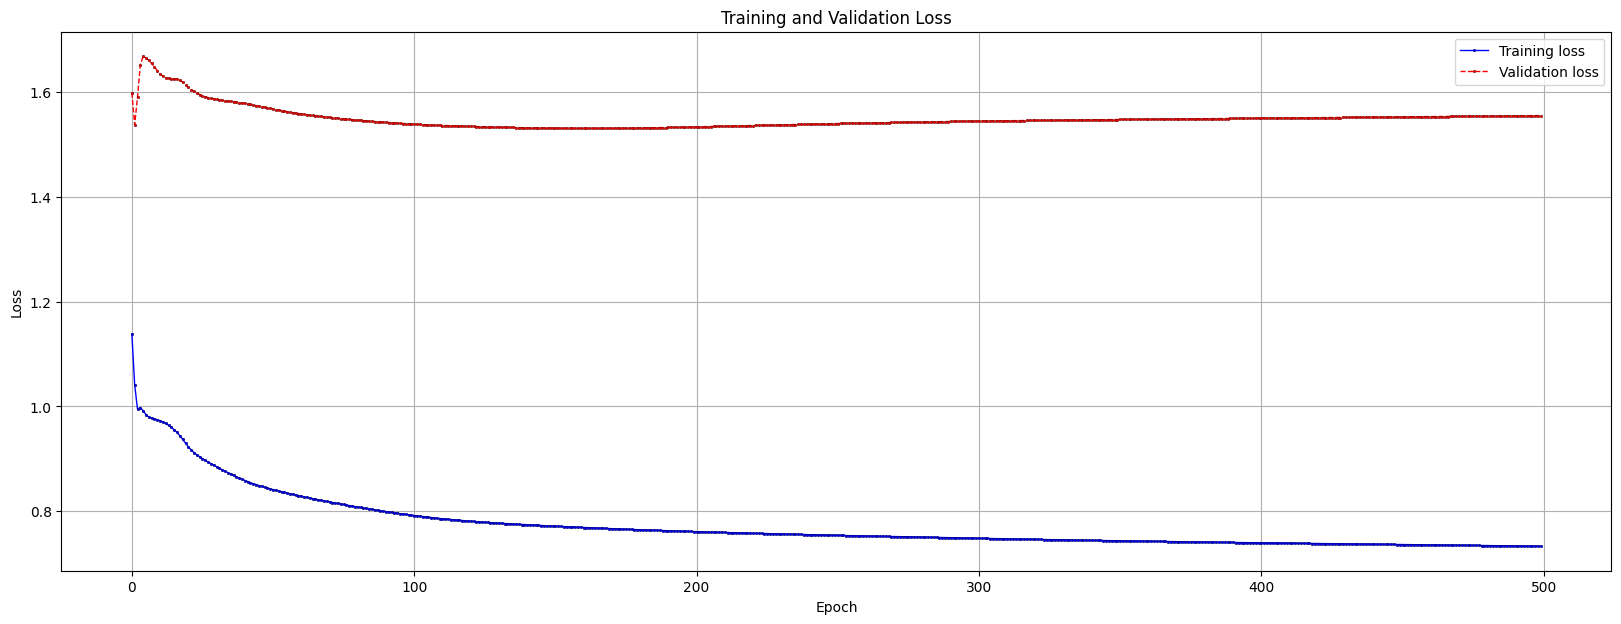

In [4]:
plt.figure(figsize=(20, 7)) 
# train_ls_offset = [(t - 0.5604837080093523) * 1/1.6011115387928316 for t in train_loss]
# val_ls_offset = [(t - 0.5604837080093523) * 1/1.6011115387928316 for t in val_loss]
plt.plot(train_loss, label='Training loss', color='blue', linestyle='-', linewidth = 1, marker = 'o', ms = 2, markeredgecolor='black', markeredgewidth=0.2)
plt.plot(val_loss, label='Validation loss', color='red', linestyle='dashed', linewidth = 1, marker = 'o', ms = 2, markeredgecolor='black', markeredgewidth=0.2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Training and Validation Loss')
plt.savefig('plots/modelA_mean_500_epochs.png', bbox_inches='tight')

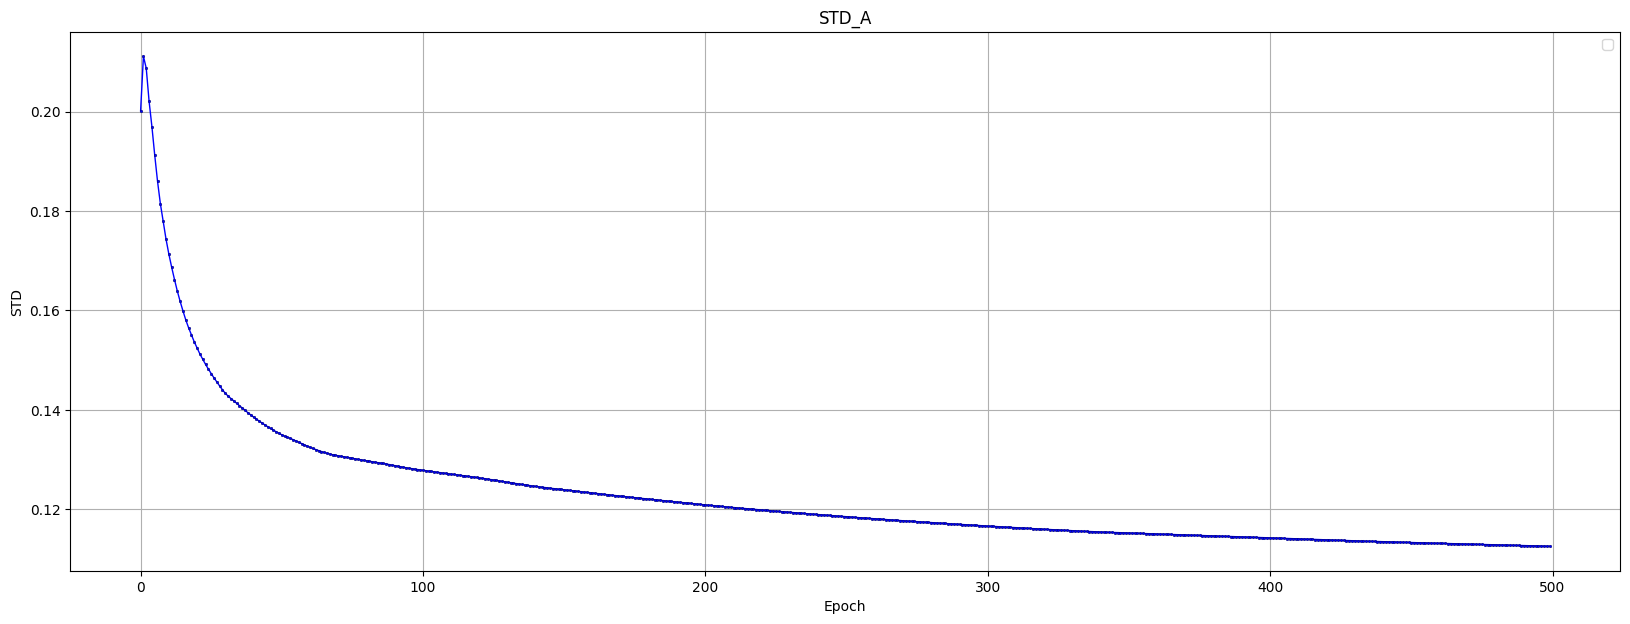

In [4]:
plt.figure(figsize=(20, 7)) 
plt.plot(std_vals, color='blue', linestyle='-', linewidth = 1, marker = 'o', ms = 2, markeredgecolor='black', markeredgewidth=0.2)
plt.xlabel('Epoch')
plt.ylabel('STD')
plt.legend()
# plt.minorticks_on()
plt.grid(True, which="major")
plt.grid(True, which="minor")
plt.title('STD_A')
plt.savefig('plots/modelC_variable_std_vals.png', bbox_inches='tight')

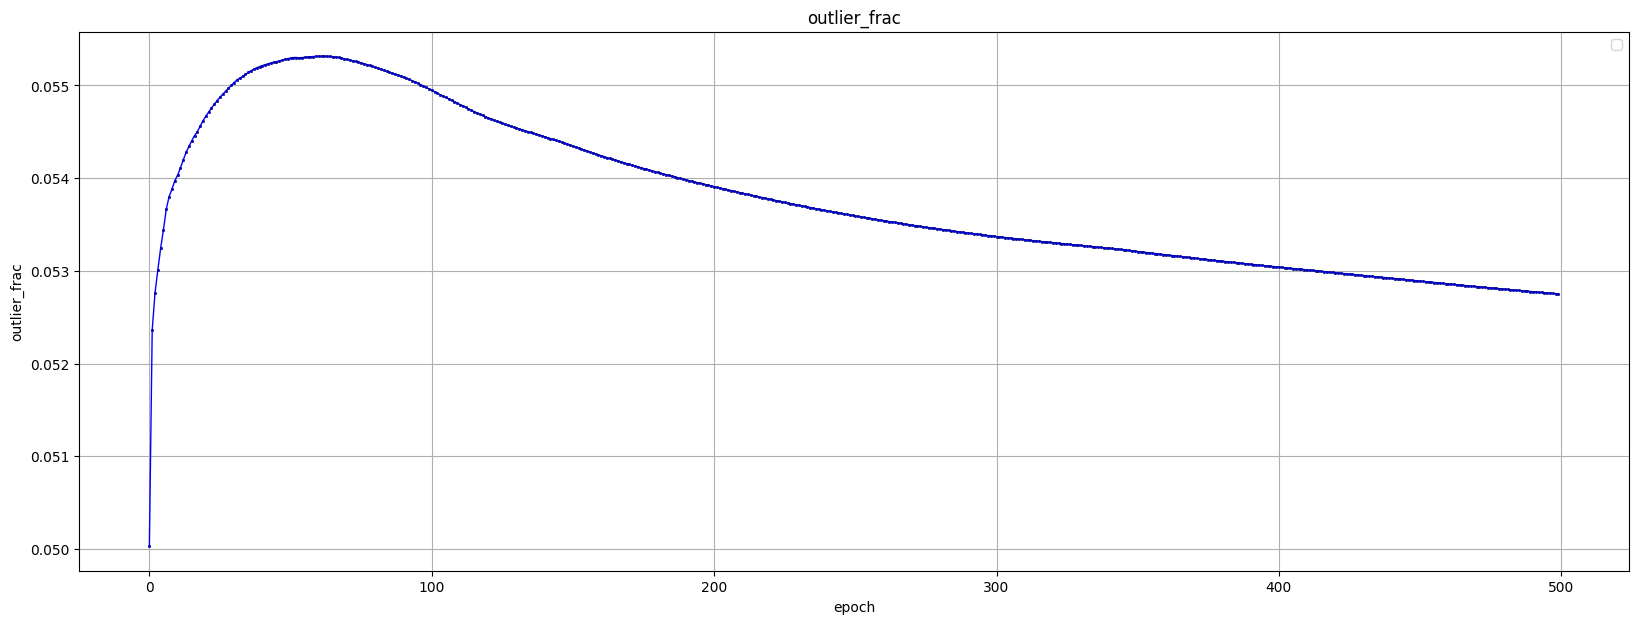

In [5]:
plt.figure(figsize=(20, 7)) 
plt.plot(outlier_frac_vals, color='blue', linestyle='-', linewidth = 1, marker = 'o', ms = 2, markeredgecolor='black', markeredgewidth=0.2)
plt.xlabel('epoch')
plt.ylabel('outlier_frac')
plt.legend()
# plt.minorticks_on()
plt.grid(True, which="major")
plt.grid(True, which="minor")
plt.title('outlier_frac')
plt.savefig('plots/modelC_variable_outlier_frac_vals.png', bbox_inches='tight')

#### Saving model and losses

In [6]:
# model_A.save('modelA_mean_500_epochs_new')
# model_A = tf.keras.models.load_model('model_A_2022_fixed_50_epochs') # model_A_2022_100epochs

# write losses to a file
with open('out_files/'+r'modelA_mean_train_loss.txt', 'w') as fp:
    for item in train_loss:
        fp.write("%s\n" % item.numpy())
    print('done writing train loss...')
with open('out_files/'+r'modelA_mean_val_loss.txt', 'w') as fp:
    for item in val_loss:
        fp.write("%s\n" % item.numpy())
    print('done writing val loss...')
# with open(r'modelC_variable_std_vals.txt', 'w') as fp:
#     for item in std_vals:
#         fp.write("%s\n" % item)
#     print('done writing std vals...')
# with open(r'modelC_variable_outlier_frac_vals.txt', 'w') as fp:
#     for item in outlier_frac_vals:
#         fp.write("%s\n" % item)
#     print('done writing outlier vals...')

done writing train loss...
done writing val loss...


In [7]:
print(std_vals[-1])
print(np.log(std_vals[-1]))
print(outlier_frac_vals[-1])
# get the final prediction for constant std and feed it in get_std_model_pred

0.1125117878530318
-2.1846972819109607
0.052750671234360016


### Training Sigma model

In [2]:
# pass in the log of the last std val to help train the sigma model
model_A = tf.keras.models.load_model('models/modelC/modelC_mean/') # model_A_2022_100epochs

# note: 0.12374137631361162 is the last value of the sigma variable trained in model C
model_std, model_A, train_loss_A, train_loss_std, val_loss_A, val_loss_std, outlier_frac_vals = \
    train_sigma_model(model_A=model_A, 
                      constant_log_std=np.log(0.1125117878530318))

done  0

Start of epo ch 1


ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

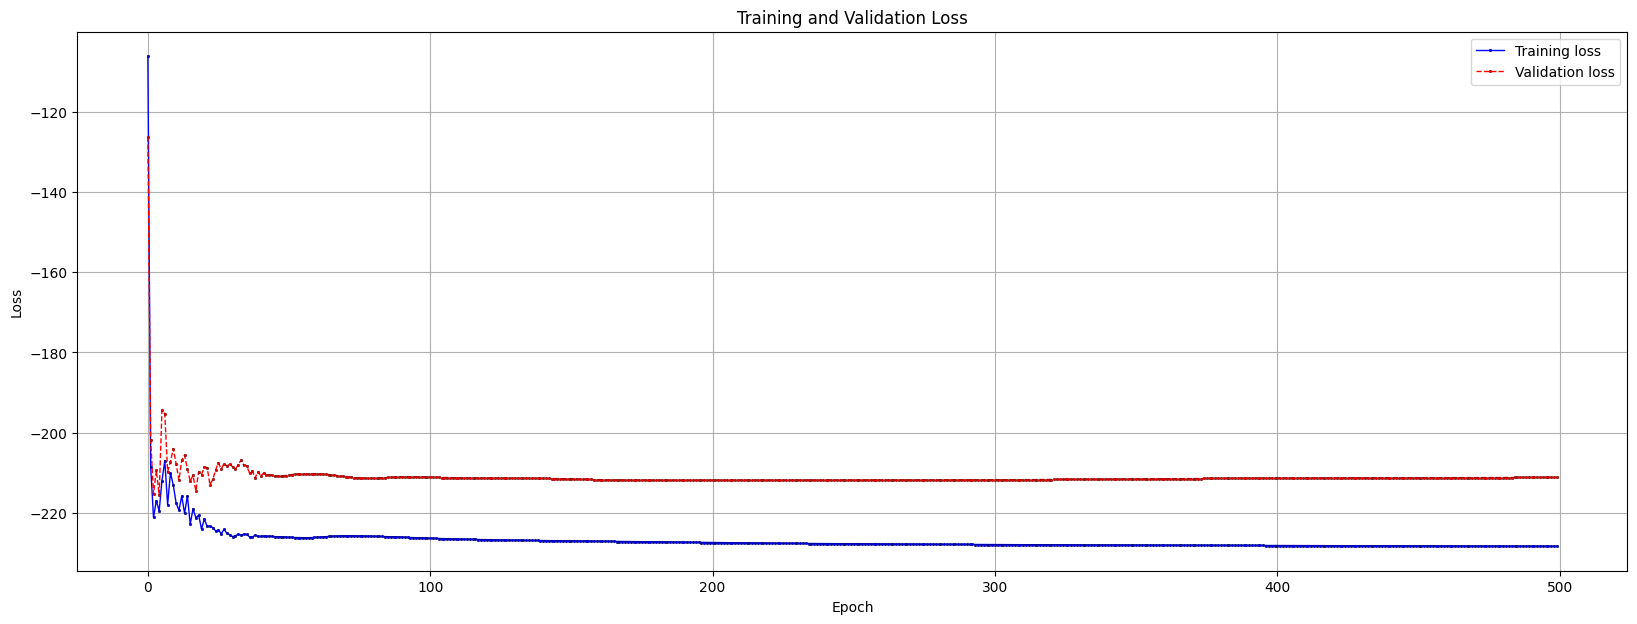

In [5]:
plt.figure(figsize=(20, 7)) 
plt.plot(train_loss_A, label='Training loss', color='blue', linestyle='-', linewidth = 1, marker = 'o', ms = 2, markeredgecolor='black', markeredgewidth=0.2)
plt.plot(val_loss_A, label='Validation loss', color='red', linestyle='dashed', linewidth = 1, marker = 'o', ms = 2, markeredgecolor='black', markeredgewidth=0.2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Training and Validation Loss')
plt.savefig('plots/modelD_mean_500_epochs.png', bbox_inches='tight')

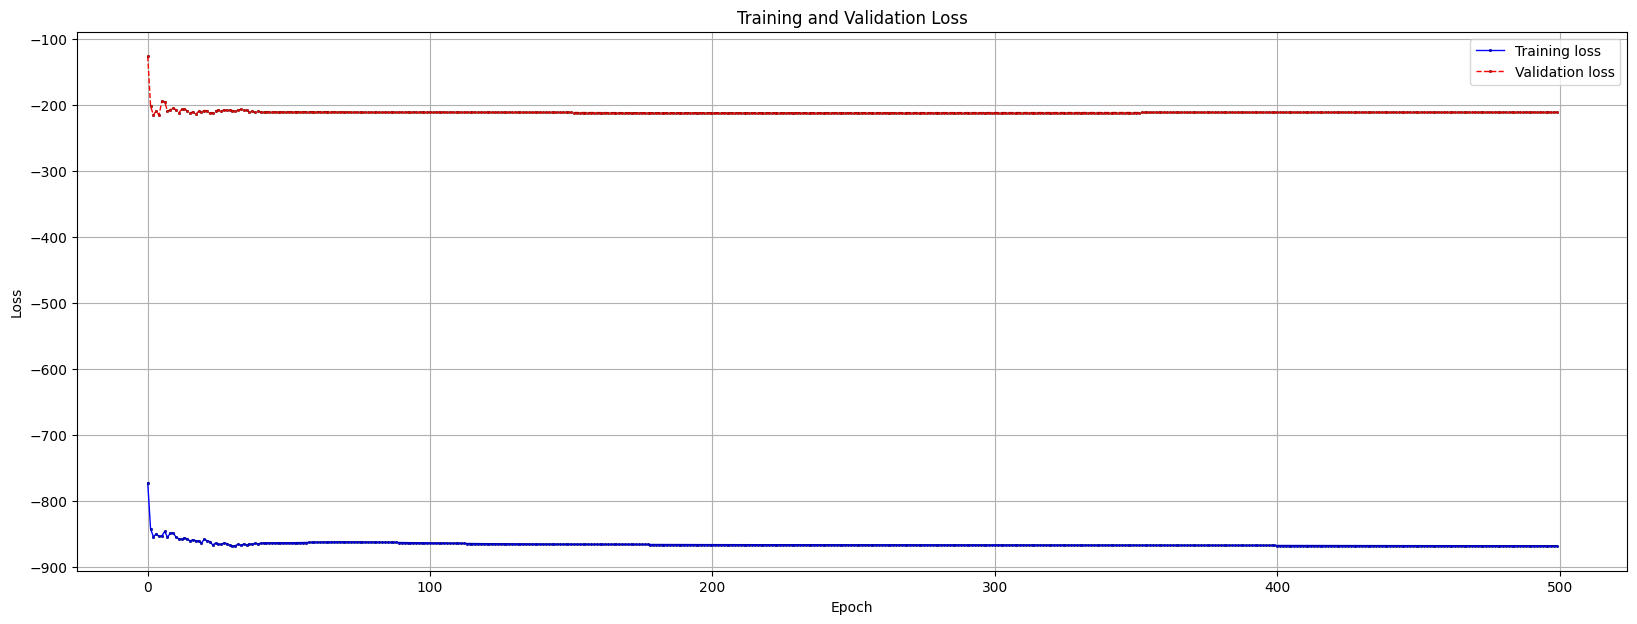

In [6]:
plt.figure(figsize=(20, 7)) 
plt.plot(train_loss_std, label='Training loss', color='blue', linestyle='-', linewidth = 1, marker = 'o', ms = 2, markeredgecolor='black', markeredgewidth=0.2)
plt.plot(val_loss_std, label='Validation loss', color='red', linestyle='dashed', linewidth = 1, marker = 'o', ms = 2, markeredgecolor='black', markeredgewidth=0.2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Training and Validation Loss')
plt.savefig('plots/modelD_std_500_epochs.png', bbox_inches='tight')

##### Saving model and losses

In [8]:
# saving model D
model_std.save('models/modelD/modelD_std')
model_A.save('models/modelD/modelD_mean')

# loss for mean
with open('out_files/'+r'modelD_mean_train_loss.txt', 'w') as fp:
    for item in train_loss_A:
        fp.write("%s\n" % item.numpy())
    print('done writing train loss...')
with open('out_files/'+r'modelD_mean_val_loss.txt', 'w') as fp:
    for item in val_loss_A:
        fp.write("%s\n" % item.numpy())
    print('done writing val loss...')

# loss for std
with open('out_files/'+r'modelD_std_train_loss.txt', 'w') as fp:
    for item in train_loss_std:
        fp.write("%s\n" % item.numpy())
    print('done writing train loss...')
with open('out_files/'+r'modelD_std_val_loss.txt', 'w') as fp:
    for item in val_loss_std:
        fp.write("%s\n" % item.numpy())
    print('done writing val loss...')

# outlier frac
with open('out_files/'+r'modelD_variable_outlier_frac_vals.txt', 'w') as fp:
    for item in outlier_frac_vals:
        fp.write("%s\n" % item)
    print('done writing outlier vals...')

INFO:tensorflow:Assets written to: models/modelD/modelD_std_500_epochs_new/assets


INFO:tensorflow:Assets written to: models/modelD/modelD_std_500_epochs_new/assets


INFO:tensorflow:Assets written to: models/modelD/modelD_mean_500_epochs_new/assets


INFO:tensorflow:Assets written to: models/modelD/modelD_mean_500_epochs_new/assets


done writing train loss...
done writing val loss...
done writing train loss...
done writing val loss...
done writing outlier vals...


#### Correlation between sigma and mean predictions

In [ ]:
samp_size = 5
def get_NN_pred_mean(model, X_data):
    '''Return (A_mean, A_std) prediction given list of (x, y, z)'''
    X_data_flattened = X_data.reshape([len(X_data) * samp_size, 3])
    pred = model(X_data_flattened, training=False) # (len(X_data) * SAMPLE_SIZE, 3)
    pred_np = pred.numpy()
    # pred_np = pred_np.reshape([len(X_data), SAMPLE_SIZE])
    pred_np = tf.reshape(pred_np, pred_np.shape[0])
    return pred_np

# FOR NOW IGNORING THIS - bias doesn't apply here
def get_NN_pred_std(model_A, model_std, X_data):
    '''Return (A_mean, A_std) prediction given list of (x, y, z)'''
    # print(len(X_data))
    # print(X_data[0])
    X_data_flattened = X_data.reshape([len(X_data) * samp_size, 3])
    pred_mean = model_A(X_data_flattened, training=False) # (len(X_data) * SAMPLE_SIZE, 3)
    pred_mean = (pred_mean.numpy() - 0.111) * 1/1.22

    # np.append(X_data_flattened, pred_mean)
    # UGLY not best way to do this but np.append didn't work
    inp = []
    for i,x in enumerate(X_data_flattened):
      single_inp = [xa for xa in x] + list(pred_mean[i])
      inp.append(single_inp)
    
    inp = np.asarray(inp)
    print(inp.shape)
    pred_std = model_std(np.asarray(inp), training=False)
    pred_std = tf.reshape(pred_std, pred_std.shape[0])
    # pred_np = pred_np.reshape([len(X_data), SAMPLE_SIZE])
    return pred_std

In [ ]:
# HERE pred_std = np.arcsinh(get_NN_pred_std(model_A, model_std, X_test))
# pred_std = get_std_model_pred(model_std, model_std_inps, np.log(0.13410718414757786), training=False)


X_data_flattened = X_test.reshape([len(X_test) * samp_size, 3])
pred_mean = (get_NN_pred_mean(model_A, X_test))#  - 0.111) * 1/1.22)
pred_mean = np.reshape(pred_mean, (pred_mean.shape[0], 1))
print(X_data_flattened.shape, pred_mean.shape)
model_std_inps = np.append(X_data_flattened, pred_mean, axis=1)
print(pred_mean[10], X_data_flattened[10], model_std_inps[10])

pred_std = get_std_model_pred(model_std, model_std_inps, np.log(0.13410718414757786), training=False)
# pred_std = model_std(model_std_inps, training=False).numpy().reshape([len(los_pos)])
print(pred_std)
pred_std = np.reshape(pred_std, np.shape(pred_std)[0])
pred_std = np.exp(pred_std)
# pred_std = np.arcsinh(pred_std)


# HERE pred_mean = np.arcsinh((get_NN_pred_mean(model_A, X_test)))#  - 0.111) * 1/1.22)
# pred_std = pred_std.reshape()
print(pred_std[0], pred_mean[0].shape)
# a, b = np.polyfit(pred_std, pred_mean, 1)
# plt.plot(pred_std, a*pred_mean+b)
# TODO exp(pred_std)
# TODO dA/dr isntead of A
plt.figure(figsize=(10, 10))
plt.scatter(pred_mean, pred_std, s=3, color='blue', linestyle='-', linewidth = 0.5, marker = 'D', edgecolor='black')
plt.title(r'$\sigma$' + ' and ' + r'$A(x, y, z)$' + ' correlation')
plt.xlabel("prediction " + r'$ A(x, y, z)$')
plt.ylabel("prediction " + r'$ \sigma(x, y, z)$')
plt.savefig('plots/sep4_sigma_mean_correlation.png', bbox_inches='tight')

In [ ]:
plt.figure(figsize=(15, 8))
#plotting the loss as a function of log A on the x and y axes. This helps to stretch out the axes, since the errors scale proportional to A
print(np.shape(X_test))
print(X_test[0])
pred = model_A(X_test[:, 0])
print(Y_test.shape)

pred_asinh = np.arcsinh(pred)
Y_test_asinh = np.arcsinh(Y_test[:, 0])

# m, b = np.polyfit(Y_test, pred, 1)
# m_asinh, b_asinh = np.polyfit(Y_test_asinh, pred_asinh, 1)

plt.subplot(1, 2, 1)
plt.scatter(Y_test[:, 0], pred, s=1, color='blue', linestyle='-', linewidth = 0.2, marker = 'D', edgecolor='black') 
plt.xlabel("Intrinsic " + r'$A(r, \theta, \phi)$')
plt.ylabel("Predicted " + r'$A(r, \theta, \phi))$')
lims = [min(np.amin(Y_test[:, 0]), np.amin(pred)), max(np.amax(Y_test[:, 0]), np.amax(pred))]
plt.xlim(lims)
plt.ylim(lims)
# plt.plot(Y_test, m*Y_test + b)
plt.plot(lims, lims)
plt.title('Intrinsic vs Predicted Data ' +  r'$A(r, \theta, \phi))$')
plt.subplot(1, 2, 2)
plt.scatter(Y_test_asinh, pred_asinh, s=1, color='blue', linestyle='-', linewidth = 0.2, marker = 'D', edgecolor='black') 
plt.xlabel("Intrinsic " + r'$asinh$' + ' ' +  r'$A(r, \theta, \phi))$')
plt.ylabel("Predicted " + r'$asinh$' + ' ' +  r'$A(r, \theta, \phi))$')
lims = [min(np.amin(Y_test_asinh), np.amin(pred_asinh)), max(np.amax(Y_test_asinh), np.amax(pred_asinh))]
plt.xlim(lims)
plt.ylim(lims)
# plt.plot(Y_test_asinh, m_asinh*Y_test_asinh + b_asinh)
plt.plot(lims, lims)
plt.title('Intrinsic vs Predicted Data ' +  r'$asinh$' + ' ' +  r'$A(r, \theta, \phi))$')
plt.tight_layout(pad=3.0)
# plt.savefig('plots/typicalintrinsicvspredicted1.png', bbox_inches='tight')
# plt.savefig('plots/aug15_intrinsic_vs_predicted_asinh_A_3d_2NN.png', bbox_inches='tight')

# print(m, b)
# print(m_asinh, b_asinh)

In [ ]:
dA_dx = []
dA_dy = []
dA_dz = []

norm = model_A.get_layer('norm')
dense_1 = model_A.get_layer('dense_1')
dense_2 = model_A.get_layer('dense_2')
dense_3 = model_A.get_layer('dense_3')
pred = model_A.get_layer('predictions')

for x,y,z in Xgrid:
    xyz = tf.constant([x, y, z])
    with tf.GradientTape() as g:
        g.watch(xyz)
        Y = pred(dense_3(dense_2(dense_1(norm(tf.convert_to_tensor([xyz]))))))
    dA_dxyz = g.gradient(Y, xyz)
    dA_dx.append(dA_dxyz[0])
    dA_dy.append(dA_dxyz[1])
    dA_dz.append(dA_dxyz[2])

In [ ]:
r = np.sqrt(np.square(Xgrid[:, 0]) + np.square(Xgrid[:, 1]) + np.square(Xgrid[:, 2]))
x = Xgrid[:, 0]
y = Xgrid[:, 1]
z = Xgrid[:, 2]
x_over_r = np.divide(x, r)
y_over_r = np.divide(y, r)
z_over_r = np.divide(z, r)
dA_dr = np.multiply(dA_dx, x_over_r) + np.multiply(dA_dy, y_over_r) + np.multiply(dA_dz, z_over_r)
intrinsic = [np.exp(logdust(x,y,z)) for x,y,z in Xgrid]

In [ ]:
rcParams.update({'font.size': 18})
plt.figure(figsize=(23, 10))
plt.subplot(1, 2, 1)
intrinsic_arcsinh = np.arcsinh(intrinsic)
dA_dr_asinh = np.arcsinh(dA_dr)
plt.scatter(intrinsic_arcsinh, dA_dr_asinh, s=1, color='blue', linestyle='-', linewidth = 0.2, marker = 'D', edgecolor='black') 
plt.xlabel("Intrinsic " + r'$asinh$' + ' ' + r'$\rho(r, \theta, \phi)$')
plt.ylabel("Predicted " + r'$asinh$' + ' ' + r'$\rho(r, \theta, \phi)$')
lims = [min(np.amin(intrinsic_arcsinh), np.amin(dA_dr_asinh)), max(np.amax(intrinsic_arcsinh), np.amax(dA_dr_asinh))]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)
plt.title('Intrinsic vs Predicted ' + r'$asinh$' + ' ' + r'$\rho(r, \theta, \phi)$')
# plt.savefig('plots/aug15_intrinsic_vs_predicted_dust2.png', bbox_inches='tight')

#### Cross sectional View of A_std

#### Line of sight plots

In [ ]:
# generate a list of points along line of sight to X_test first star -- set a fixed value for x, y, z
delta_r = 0.001
ngrid, edge = 21, 2.5
max_r = edge * 2

In [ ]:
sphericalLocs = []
for theta in np.arange(-np.pi, np.pi, 20 * np.pi / 180):
    for phi in np.arange(0, np.pi, 20 * np.pi / 180):
        sphericalLocs.append([10, theta, phi])
        # print(10, theta, phi)
print(np.pi)

In [ ]:
# for i in range(1, 30): # NEW commented
for r, theta, phi in sphericalLocs:
    # select the first sample
    # x, y, z = X_test[i][0] # NEW commented
    # r, theta, phi = cart2spherical(x, y, z) # NEW commented
    x, y, z = spherical2cart(r, theta, phi)
    los_pos = []
    los_pos_r = []
    valid_r = 0

    for r_prime in np.arange(0, max_r, delta_r):
        pos_prime = spherical2cart(r_prime, theta, phi)
        los_pos.append(pos_prime)
        los_pos_r.append(r_prime)
        x_prime, y_prime, z_prime = pos_prime[0], pos_prime[1], pos_prime[2]
        if (x_prime > edge or x_prime < -edge or y_prime > edge or y_prime < -edge or z_prime > edge or z_prime < -edge) and valid_r == 0:
            valid_r = r_prime 

    los_pos = np.asarray(los_pos)
    X_data_flattened = los_pos.reshape([len(los_pos), 3])
    pred = model_A(X_data_flattened, training=False).numpy().reshape([len(los_pos)]) # (len(X_data) * SAMPLE_SIZE, 3)
    pred_A_reshaped = pred.reshape([len(los_pos), 1])
    model_std_inps = np.append(X_data_flattened, pred_A_reshaped, axis=1)
    # print(pred_A_reshaped.shape, X_data_flattened.shape, model_std_inps.shape)
    # print(pred_A_reshaped[10], X_data_flattened[10], model_std_inps[10])

    pred_std = get_std_model_pred(model_std, model_std_inps, np.log(0.13410718414757786), training=False)
    # pred_std = model_std(model_std_inps, training=False).numpy().reshape([len(los_pos)])
    # print(pred_std)
    pred_std = np.reshape(pred_std, np.shape(pred_std)[0])
    pred_std = np.exp(pred_std) * 5
    

    r_samples = []

    # ith Xo_test
    # for x, y, z in Xo_test[i]:
    #     r, theta, phi = cart2spherical(x, y, z)
    #     r_samples.append(r)
    
    pred = np.reshape(pred, (np.shape(pred)[0]))

    plt.figure(figsize=(7, 7)) 
    fig, ax = plt.subplots()
    ax.plot(los_pos_r, pred, color='#8f0000', linestyle='-', linewidth = 0.1, marker = 'o', ms = 1, markeredgewidth=0.2)
    ax.fill_between(los_pos_r, np.array(pred) - pred_std, np.array(pred) + pred_std, alpha=1, color='yellow')
    # plt.scatter(r_samples, Yo_test[i], s=5, linewidths=0.2, edgecolors='black')
    plt.axvline(x = valid_r, color='black')
    plt.xlabel('r')
    plt.ylabel('A(r)')
    plt.xlim([0, max_r])
    plt.ylim([0, 10])
    # select the first sample
    # x, y, z = X_test[i][0][0], X_test[i][0][1], X_test[i][0][2]
    # r, theta, phi = cart2spherical(x, y, z)
    plt.title(str(np.around(x / r, 2)) + 'i + ' + str(np.around(y/r, 2)) + 'j + ' + str(np.around(z/r, 2)) + ' k')
    fname = str("{:.2f}".format(x / r)) + 'i_' + str("{:.2f}".format(y / r)) + 'j_' + str("{:.2f}".format(z / r)) + 'k'
    plt.savefig(fname + '.png', bbox_inches='tight', facecolor='white', transparent=False)
    plt.close()

#### Cross sectional view of A_mean true map
Did not store the Xgrid and Ygrid values so cannot generate this one.

In [ ]:
print(Ygrid_samps.shape, Xgrid.shape)

In [ ]:
print(Ygrid_true_attenuation[0:5])

In [ ]:
ngrid =21
edge = 2.5
dA_dr_log = np.log(dA_dr)

rcParams.update({'font.size': 20})

# getting mean predictions
X_data_flattened = Xgrid.reshape([len(Xgrid), 3])
pred_A = model_A(X_data_flattened, training=False).numpy()
print(pred_A)
# getting std predictions
pred_A_reshaped = pred_A.reshape([len(Xgrid), 1])

for i in range(21):
    fig = plt.figure(figsize=(20, 16))
    ax = fig.add_subplot(111, projection='3d')
    end = ngrid*ngrid*(i+1)

    ind = [i for i,val in enumerate(dA_dr[0:end]) if val <= 0 ]
    # print(dA_dr_log[ind])
    dustneg = [-1] * len(ind)
    xneg = [Xgrid[:, 0][0:end][i] for i in ind]
    yneg = [Xgrid[:, 1][0:end][i] for i in ind]
    zneg = [Xgrid[:, 2][0:end][i] for i in ind]

    # invalid negative dust - shown in green
    im = ax.scatter(xneg, yneg, zneg, color='#7FFF00', s=400, vmin=-4, vmax=1.5, alpha=1.)
    if np.isnan(dA_dr_log[0:end]).any():
      print('has nan')
      # print(dA_dr_log[0:end])
    # print()

    # true attenuation
    # im = ax.scatter(Xgrid[:, 0][0:end], Xgrid[:, 1][0:end], Xgrid[:, 2][0:end], c=Ygrid_true_attenuation[0:end], cmap='plasma', s=150, norm=matplotlib.colors.PowerNorm(gamma=0.3)) # norm=matplotlib.colors.PowerNorm(gamma=0.9)) #)
    
    # im = ax.scatter(Xgrid[:, 0][0:end], Xgrid[:, 1][0:end], Xgrid[:, 2][0:end], c=pred_A_reshaped[0:end], cmap='plasma', s=150, norm=matplotlib.colors.PowerNorm(gamma=0.3)) #norm=matplotlib.colors.PowerNorm(gamma=0.9))

    # predicted underlying logdust 
    im = ax.scatter(Xgrid[:, 0][0:end], Xgrid[:, 1][0:end], Xgrid[:, 2][0:end], c=dA_dr_log[0:end], cmap='plasma', s=150, vmin=-2.0, vmax=2.0)
    
    # true underlying logdust
    # im = ax.scatter(Xgrid[:, 0][0:end], Xgrid[:, 1][0:end], Xgrid[:, 2][0:end], c=Ygrid_samps[0:end], cmap='plasma', s=150, vmin=-2.0, vmax=2.0)

    # residual logdust
    # im = ax.scatter(Xgrid[:, 0][0:end], Xgrid[:, 1][0:end], Xgrid[:, 2][0:end], c=dA_dr_log[0:end] - Ygrid_samps[0:end], cmap='coolwarm', s=150, vmin=-1.5, vmax=1.5)
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    cbar = plt.colorbar(im, shrink=0.85)
    cbar.set_label('logdust residual')
    plt.tight_layout()
    plt.xlim((-edge, edge))
    plt.ylim((-edge, edge))
    plt.savefig(str(i) + '.png', bbox_inches='tight')
    plt.close()

# setting back the intrinsic set
# intrinsic = [np.exp(logdust(x,y)) for x,y in X_test_cart]